# Data Collection And Preprocessing

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
     shuffle=True,
     image_size=(IMAGE_SIZE,IMAGE_SIZE),
     batch_size = BATCH_SIZE
)

Found 1550 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy']

In [5]:
len(dataset)

49

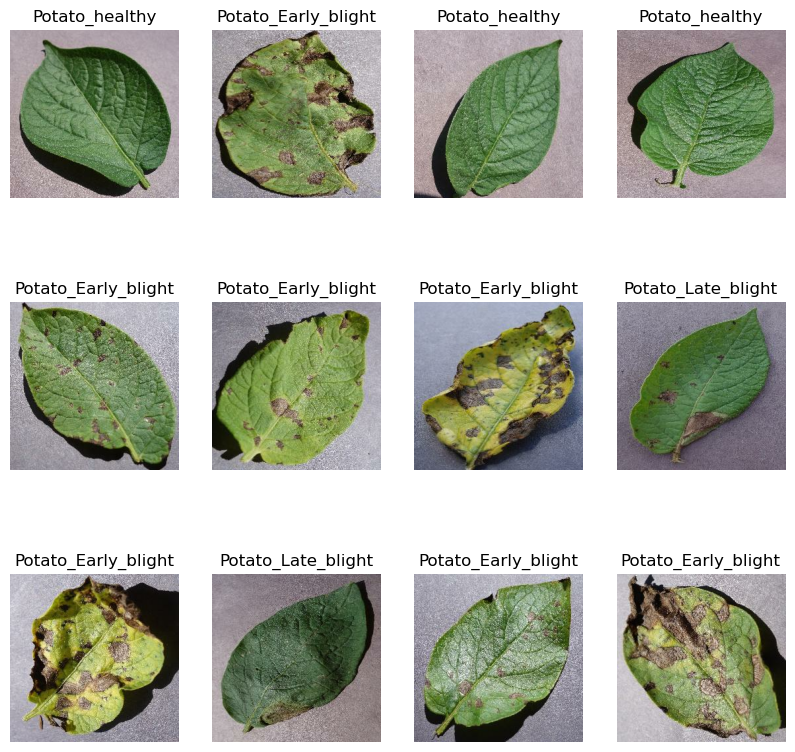

In [6]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
       ax=plt.subplot(3,4,i+1)
       plt.imshow(image_batch[i].numpy().astype("uint8"))
       plt.title(class_names[label_batch[i]])
       plt.axis("off")

# Spilit Dataset

In [7]:
len(dataset)

49

In [8]:
training=0.8
validation=0.1
test=0.1

In [9]:
train_size =0.8
len(dataset)*train_size

39.2

In [10]:
train_ds = dataset.take(39)
len(train_ds)

39

In [11]:
test_ds = dataset.skip(39)
len(test_ds)

10

In [12]:
val_size=0.1
len(dataset)*val_size

4.9

In [13]:
val_ds = test_ds.take(4)
len(val_ds)

4

In [14]:
test_ds = test_ds.skip(4)
len(test_ds)

6

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True,shuffle_size=10000):
    ds_size =len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size =int(train_split * ds_size)
    val_size =int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [16]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

39

In [18]:
len(val_ds)

4

In [19]:
len(test_ds)

6

Cache- to increase data retrieval performance by reducing the need to access the underlying slower storage layer

Shuffle-Randomly shuffles the input data.

Prefetch-loading data into memory ahead of time to minimize the time spent waiting for data during training.

In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

#Data Augmentation Layer

Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

# Model Building

In [22]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3) ,activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])
model.build(input_shape = input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/50
39/39 [==============================] - 284s 7s/step - loss: 0.9195 - accuracy: 0.4813 - val_loss: 0.9475 - val_accuracy: 0.4297
Epoch 2/50
39/39 [==============================] - 265s 7s/step - loss: 0.8666 - accuracy: 0.5561 - val_loss: 0.8549 - val_accuracy: 0.5156
Epoch 3/50
39/39 [==============================] - 220s 6s/step - loss: 0.7165 - accuracy: 0.7146 - val_loss: 0.6454 - val_accuracy: 0.7578
Epoch 4/50
39/39 [==============================] - 217s 6s/step - loss: 0.5099 - accuracy: 0.7927 - val_loss: 0.3954 - val_accuracy: 0.8672
Epoch 5/50
39/39 [==============================] - 228s 6s/step - loss: 0.4026 - accuracy: 0.8439 - val_loss: 0.4301 - val_accuracy: 0.8047
Epoch 6/50
39/39 [==============================] - 212s 5s/step - loss: 0.3569 - accuracy: 0.8520 - val_loss: 0.3246 - val_accuracy: 0.8828
Epoch 7/50
39/39 [==============================] - 291s 7s/step - loss: 0.3033 - accuracy: 0.8846 - val_loss: 0.3043 - val_accuracy: 0.8906
Epoch 8/50
39

In [26]:
scores = model.evaluate(test_ds)

6/6 [==============================] - 4s 613ms/step - loss: 0.0390 - accuracy: 0.9896


In [27]:
scores

[0.039021629840135574, 0.9895833134651184]

In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 39}

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

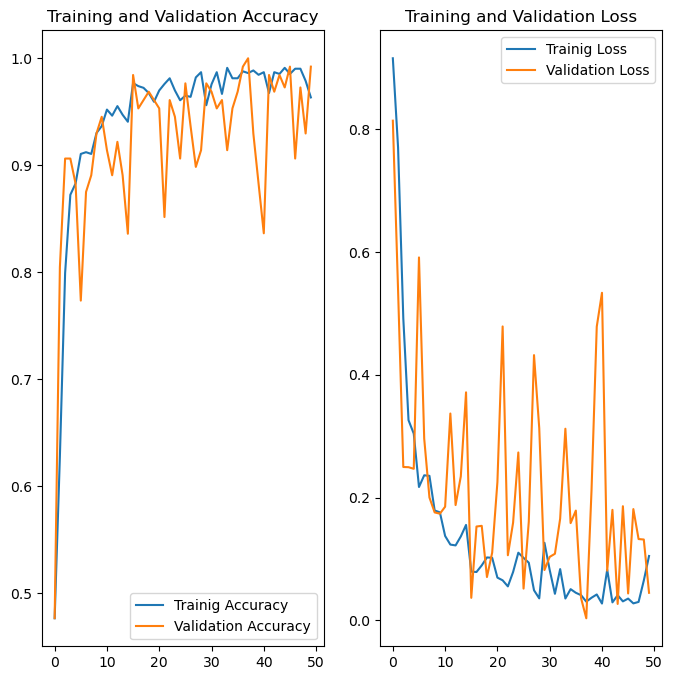

In [32]:
plt.figure(figsize=(8 ,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Trainig Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Trainig Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


In [38]:
np.argmax([8.2405217e-07, 7.5686389e-01, 2.4313527e-01])

1

first image to predict
actual label : Potato_Late_blight
prediction label: Potato_Early_blight


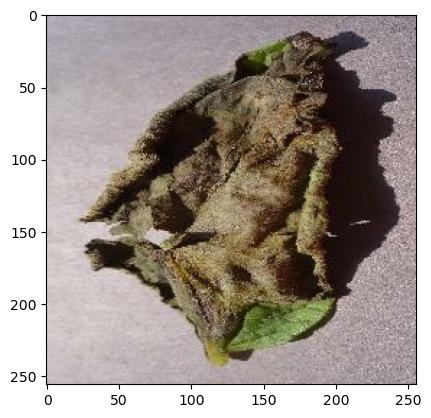

In [48]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[2].numpy().astype('uint8')
    first_label = labels_batch[2].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label :",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("prediction label:",class_names[np.argmax(batch_prediction[0])])

In [52]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 2)  #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(batch_prediction[2])]
    confidence = round(100 * (np.argmax(predictions[2])), 2)
    return predicted_class, confidence

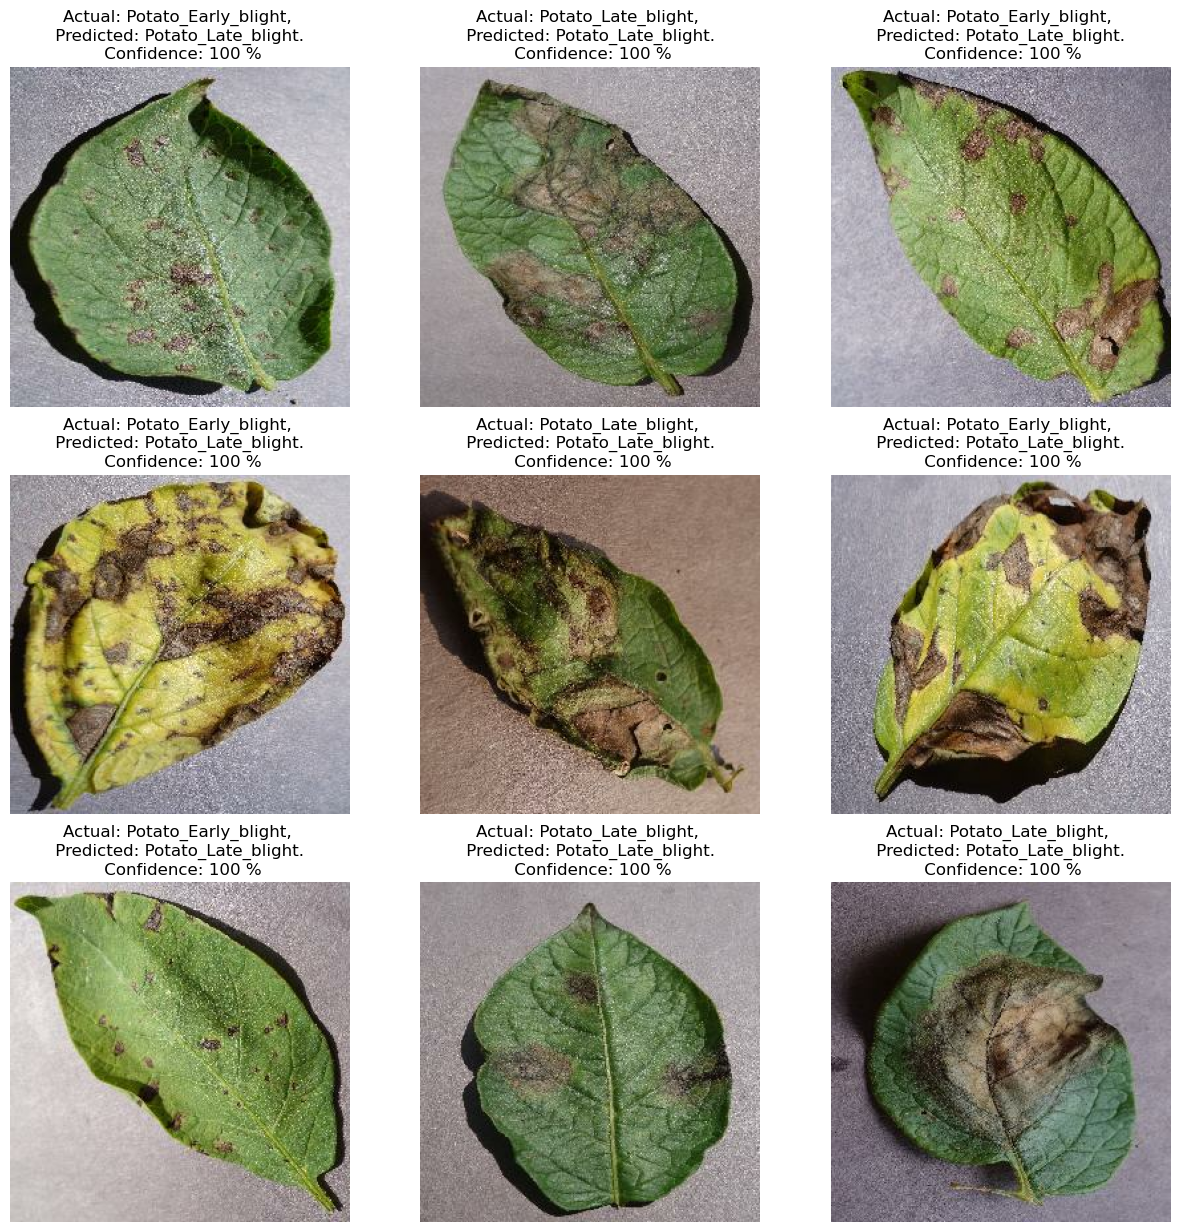

In [53]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1) :
    for i in range(9) :
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence =predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence} %")
        plt.axis("off")

In [54]:
import os
model_version = max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/9\assets
